In [1]:
#import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)   

2.10.0


In [2]:
#load in data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)


In [3]:
#build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation = "relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = "softmax")
])

In [4]:
#compile the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [5]:
#train the model/fit the data
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2997 - accuracy: 0.9138 - val_loss: 0.1435 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1454 - accuracy: 0.9575 - val_loss: 0.1087 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1067 - accuracy: 0.9671 - val_loss: 0.0992 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.0804 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0744 - accuracy: 0.9764 - val_loss: 0.0743 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0648 - accuracy: 0.9789 - val_loss: 0.0787 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0571 - accuracy: 0.9806 - val_loss: 0.0694 - val_accu

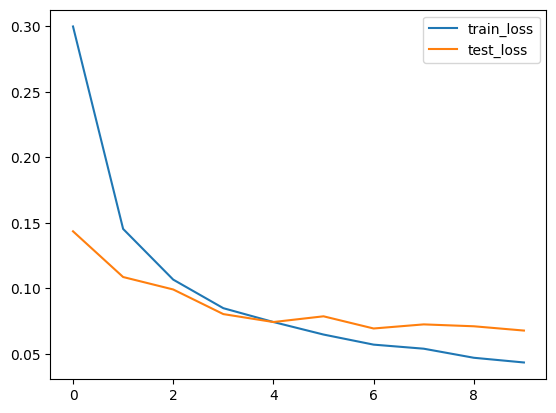

In [6]:
#plotting loss per iteration
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()

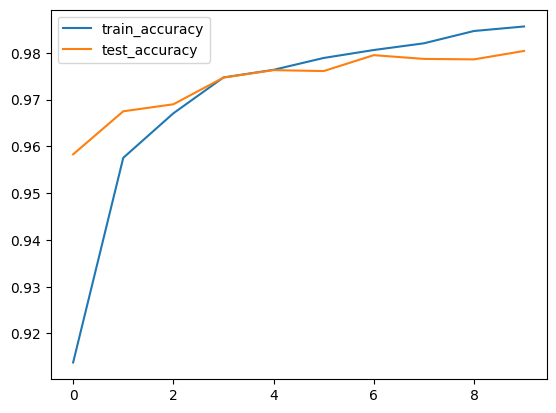

In [7]:
#plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train_accuracy')
plt.plot(r.history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.show()

In [8]:
#evaluating the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9804
[0.06784112751483917, 0.980400025844574]
